In [1]:
from pairtrader import *

In [2]:
close = pd.read_csv('data/crypto_1m.csv', index_col='unix') # reads the closing prices of 129 stocks from the energy sector
close.shape # N closing prices, 17 different symbols

(248925, 17)

In [3]:
# choose a pair; refer to our heatmap to choose a cointegrated pair
# use 48 hours; first 24 for model fit, last 24 for model test
# Order matters slightly! Ideally order by how regression for adf test was ordered.
X = close['trx'][-60*24*2:]
Y = close['ada'][-60*24*2:]

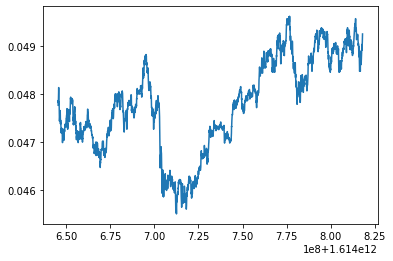

In [4]:
plt.plot(X)

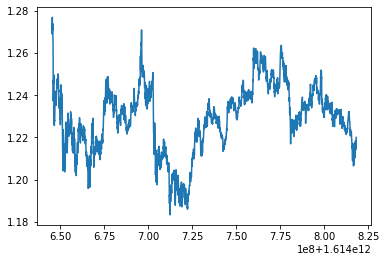

In [5]:
plt.plot(Y)

In [6]:
# params
z_crit = 2.5
z_sl = .5
z_tp = .5
window = 6*60
trade_size = 100
trainval_split = len(X)//2
# first half of split meets model assumptions by adf test (reject unit root = 1)
# first half of split is training set used to fit Y ~ X
# second half of split is validation set where trading occurs

In [7]:
pt = PairTrader(X, Y, z_crit, z_sl, z_tp, trainval_split, window, trade_size)

In [8]:
pt.fit_model()

In [9]:
account, logs = pt.test_model()

In [10]:
print('Cash Balance:', account.cash_balance)
print('Asset Balance:', account.asset_balance)
print('Total Balance:', account.total_balance)
print('Open Positions:', account.positions)
longs = [i[0] for i in logs if i[1] == 'L']
shorts = [i[0] for i in logs if i[1] == 'S']
stop_loss = [i[0] for i in logs if i[1] == 'SL']
take_profit = [i[0] for i in logs if i[1] == 'TP']
print('Losses:', len(stop_loss))
print('Profits:', len(take_profit))

Cash Balance: 102.39800638793133
Asset Balance: 0
Total Balance: 102.39800638793133
Open Positions: {}
Losses: 0
Profits: 0


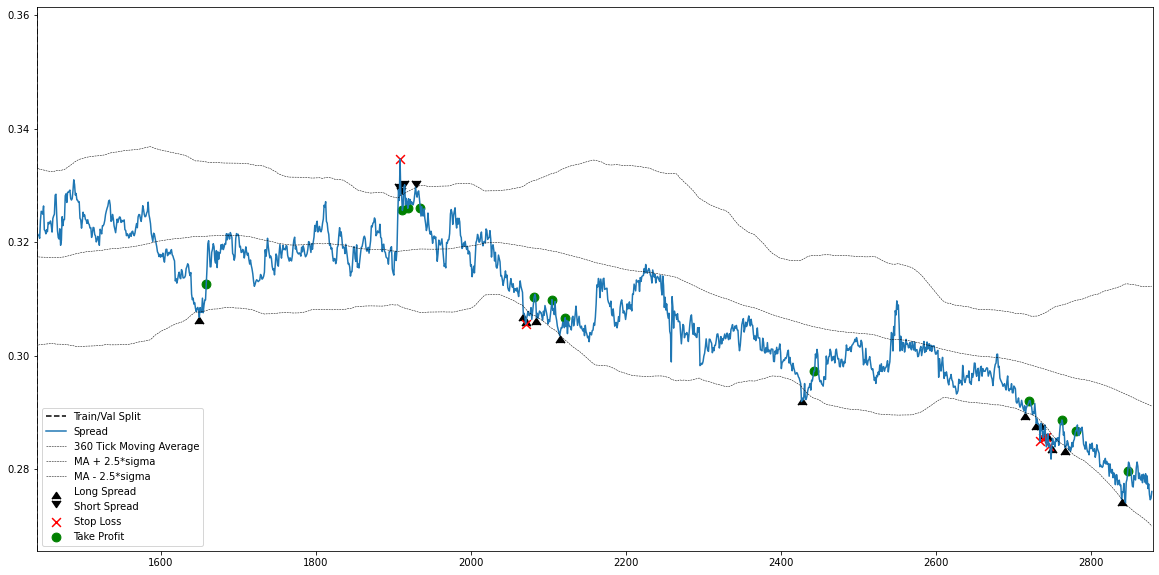

In [11]:
spread_plot = pt.plot('spread', zoom=True)

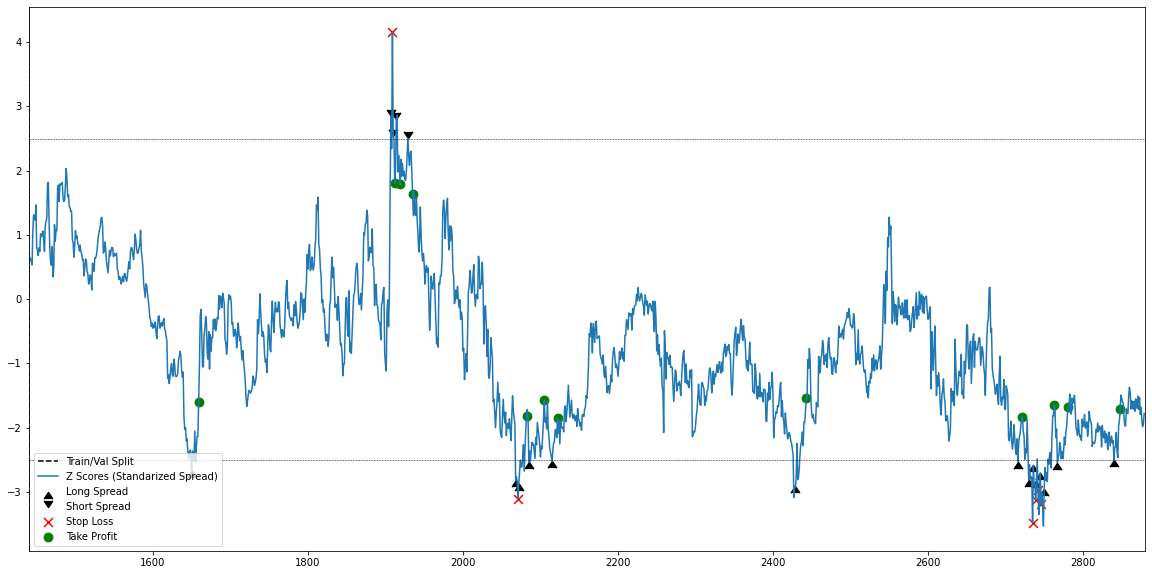

In [12]:
z_plot = pt.plot('z', zoom=True)

In [13]:
df = pt.get_df()
df

,status,spread,stoploss,takeprofit,balance,diffs
1650,L,0.306777,0.305008,0.310338,100.000000,NaN
1659,TP,0.312633,NaN,NaN,100.479985,4.799852e-01
1907,S,0.329210,0.329793,0.325991,100.479985,0.000000e+00
1909,SL,0.334666,NaN,NaN,100.046097,-4.338882e-01
1910,S,0.328405,0.330226,0.326297,100.046097,0.000000e+00
1912,TP,0.325601,NaN,NaN,100.269276,2.231790e-01
1914,S,0.329717,0.330526,0.326512,100.269276,-1.421085e-14
1919,TP,0.325966,NaN,NaN,100.567013,2.977372e-01
1929,S,0.329669,0.331816,0.327453,100.567013,1.421085e-14
1935,TP,0.326100,NaN,NaN,100.849870,2.828565e-01


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  2.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.43388823, -0.42474949, -0.41561076, -0.40647202, -0.39733329,
        -0.38819455, -0.37905582, -0.36991709, -0.36077835, -0.35163962,
        -0.34250088, -0.33336215, -0.32422341, -0.31508468, -0.30594595,
        -0.29680721, -0.28766848, -0.27852974, -0.26939101, -0.26025227,
        -0.25111354, -0.24197481, -0.23283607, -0.22369734, -0.2145586 ,
        -0.20541987, -0.19628113, -0.1871424 , -0.17800367, -0.168864

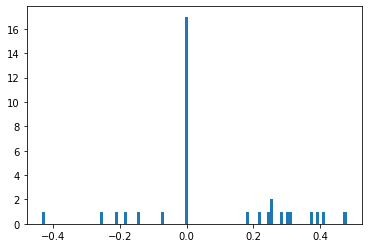

In [14]:
plt.hist(df['diffs'], bins=100)